# Transforming Numerical Variables

- transforming variables may improve the performance of linear machine learning models

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

## Transforming variables with the logarithm

- strong effect on the shape of the variable distribution and can only be applied to positive variables

In [3]:
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer

In [4]:
data = pd.read_csv("data/boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

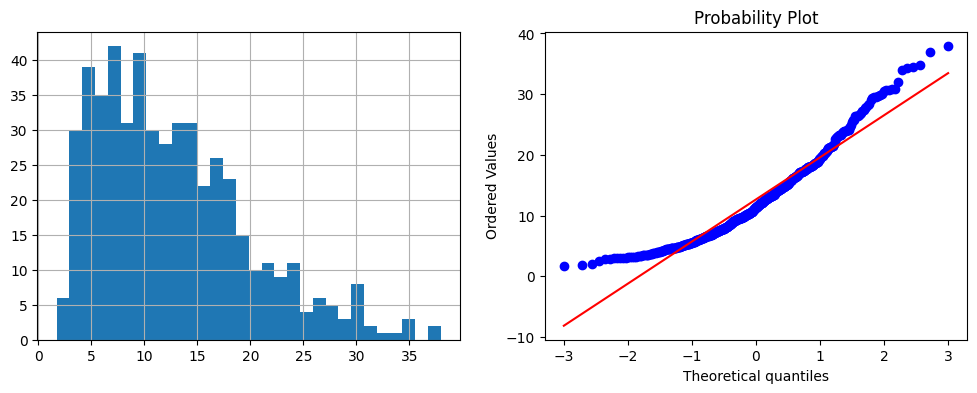

In [6]:
diagnostic_plots(data, 'LSTAT')

In [7]:
data_tf = data.copy()

In [8]:
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(data[['LSTAT', 'NOX', 'DIS', 'RM']])

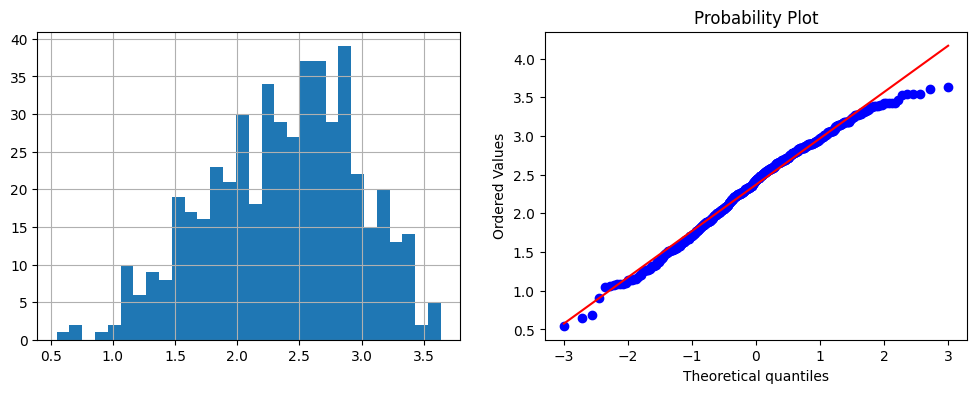

In [9]:
diagnostic_plots(data_tf, 'LSTAT')

In [10]:
transformer = FunctionTransformer(np.log)

In [11]:
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS', 'RM']])

## Transforming variables with the reciprocal function

- is a strong transformation with a very drastic effect on the variable distribution
- isn't defined for the value 0, but it can be applied to negative numbers

In [12]:
from sklearn.preprocessing import FunctionTransformer


data = pd.read_csv("data/boston.csv")

In [13]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

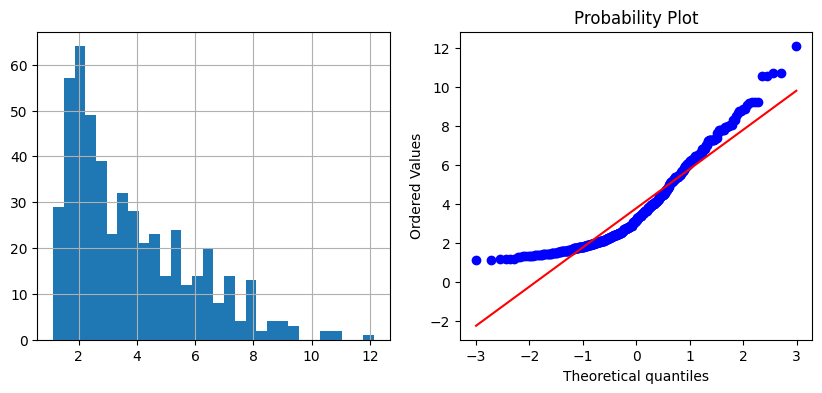

In [14]:
diagnostic_plots(data, 'DIS')

In [15]:
transformer = FunctionTransformer(np.reciprocal)

In [16]:
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS', 'RM']])

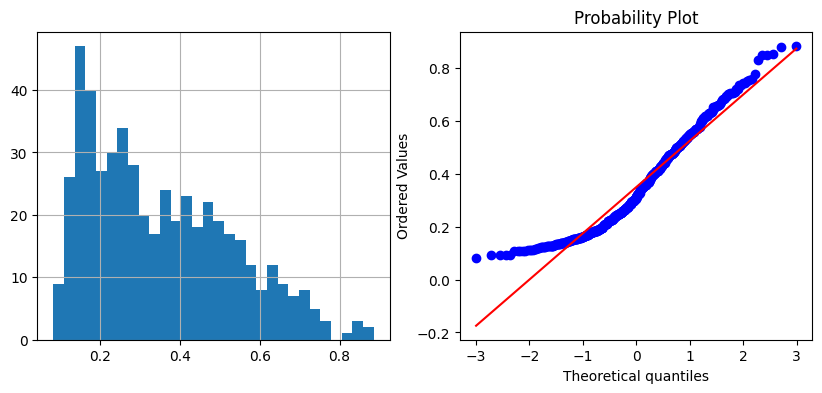

In [17]:
data_tf = pd.DataFrame(data_tf, columns=['LSTAT', 'NOX', 'DIS', 'RM'])
diagnostic_plots(data_tf, 'DIS')

## Using power transformations on numerical variables

In [18]:
from sklearn.preprocessing import FunctionTransformer

data = pd.read_csv("data/boston.csv")

In [19]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


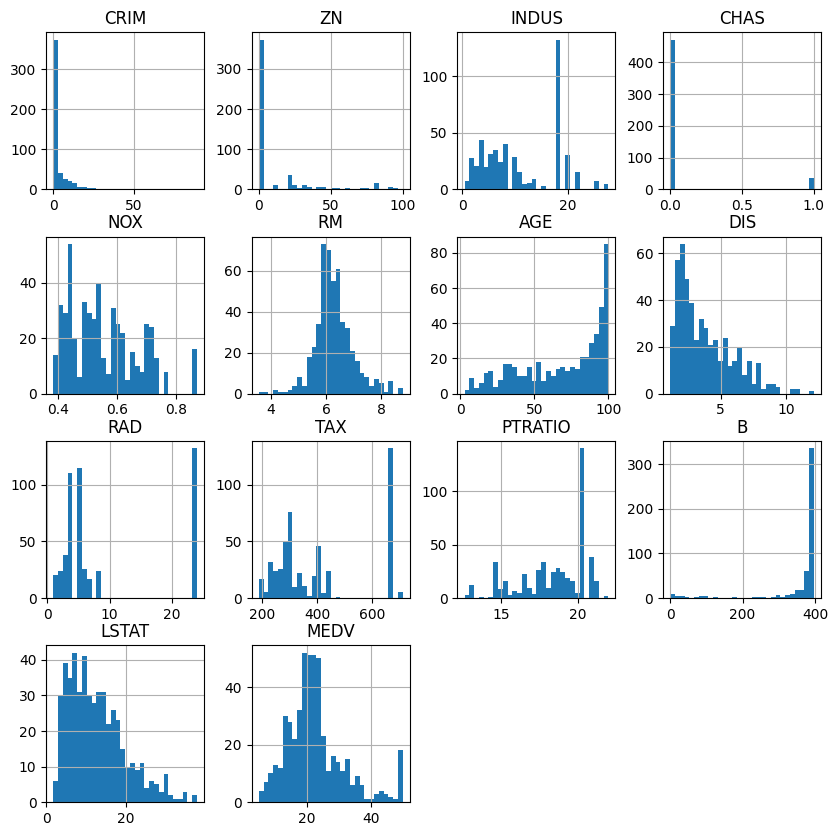

In [20]:
data.hist(bins=30, figsize=(10,10))
plt.show()

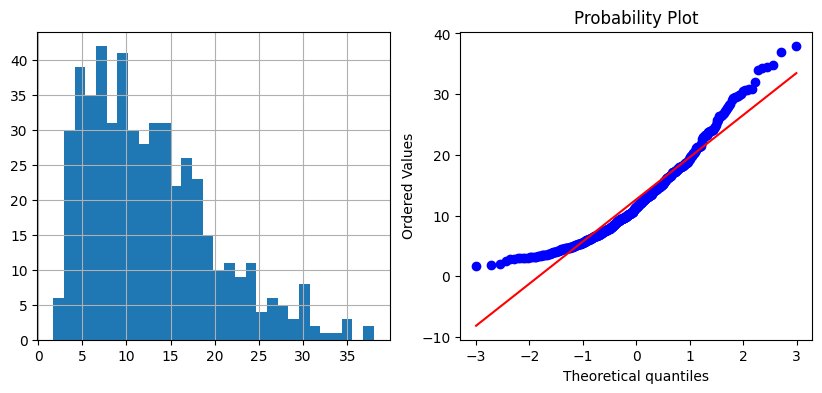

In [21]:
diagnostic_plots(data, 'LSTAT')

In [22]:
# make a copy of the dataframe where we will store the modified
# variables
data_tf = data.copy()

In [23]:
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

# capture variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
data_tf = transformer.transform(data[cols])

data_tf = pd.DataFrame(data_tf, columns=cols)

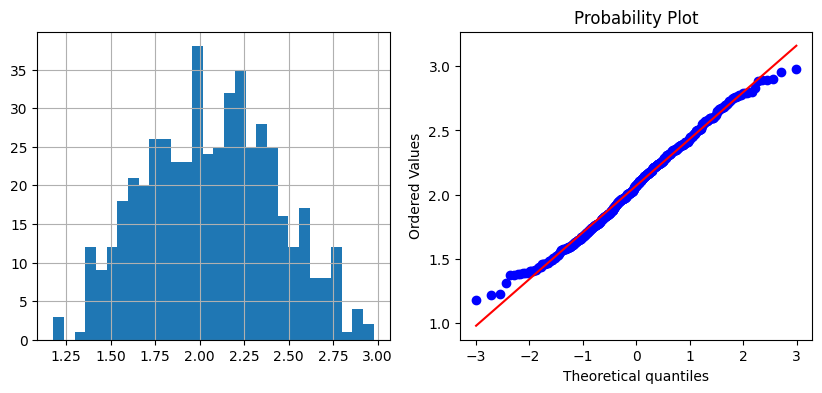

In [24]:
# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Using square and cube root to transform variables

In [25]:
data = pd.read_csv("data/boston.csv")

data_tf = data.copy()

transformer = FunctionTransformer(np.sqrt)

# make a list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

data_tf = pd.DataFrame(data_tf, columns=cols)

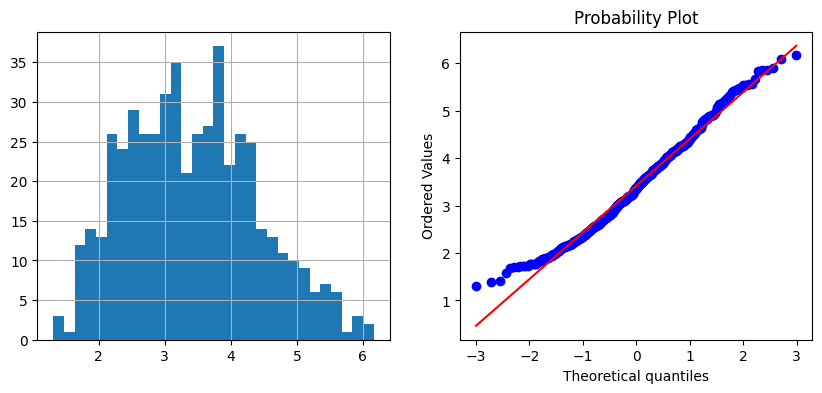

In [26]:
diagnostic_plots(data_tf, 'LSTAT')

## Example: Customer churn dataset

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('data/sampleSubmission.csv')
df = df.rename(columns=str.lower)
df['churn'] = df['churn'].replace(('yes', 'no'), (1, 0))
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [5]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
df.shape

(4250, 20)

In [7]:
X = df.drop(['churn'], axis=1)
y = df['churn']

### Simple baseline

In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    predictions = model.predict(X_test)
    print(f"------------- {type(model).__name__} -------------")
    print(f"Training set score: {model.score(X_train, y_train):.2f}")
    print(f"Test set score: {model.score(X_test, y_test):.2f}")
    print('Accuracy: ', accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
get_score(knn, X_train, X_test, y_train, y_test)

log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)
get_score(log, X_train, X_test, y_train, y_test)

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
get_score(tree, X_train, X_test, y_train, y_test)

------------- KNeighborsClassifier -------------
Training set score: 0.90
Test set score: 0.89
Accuracy:  0.8941176470588236
[[1096    6]
 [ 129   44]]
------------- LogisticRegression -------------
Training set score: 0.87
Test set score: 0.87
Accuracy:  0.8713725490196078
[[1072   30]
 [ 134   39]]
------------- DecisionTreeClassifier -------------
Training set score: 0.98
Test set score: 0.95
Accuracy:  0.9466666666666667
[[1078   24]
 [  44  129]]


### With feature engineering


In [15]:
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
def get_total_net_minutes(df):
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    return df

def get_total_net_calls(df):
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    return df

def get_total_net_charge(df):
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    return df

def cs_calls_per_month(df):
    df['cs_calls_per_month'] = (df['number_customer_service_calls'] + df['number_vmail_messages']) / df['account_length']
    return df

In [17]:
feature_engineering = ColumnTransformer([
    ('total_net_minutes', FunctionTransformer(get_total_net_minutes, validate=False),
     ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']),
    ('total_net_calls', FunctionTransformer(get_total_net_calls, validate=False),
     ['total_day_calls', 'total_eve_calls', 'total_night_calls']),
    ('total_net_charge', FunctionTransformer(get_total_net_charge, validate=False),
     ['total_day_charge', 'total_eve_charge', 'total_night_charge']),
    ('cs_calls_per_month', FunctionTransformer(cs_calls_per_month, validate=False),
     ['account_length', 'number_customer_service_calls', 'number_vmail_messages']),
])

In [18]:
categorical_columns = list(X_train.select_dtypes(include=['object']).columns.values.tolist())
numeric_columns = list(X_train.select_dtypes(exclude=['object']).columns.values.tolist())

In [20]:
categorical_columns

['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [19]:
numeric_columns

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [21]:
numeric_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('feature_engineering', feature_engineering, numeric_columns),
        ('numeric_transformers', numeric_transformer, numeric_columns),
        ('categorical_transformers', categorical_transformer, categorical_columns),
    ])

In [23]:
model = DecisionTreeClassifier(max_depth=10)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('feature_engineering',
                                                  ColumnTransformer(transformers=[('total_net_minutes',
                                                                                   FunctionTransformer(func=<function get_total_net_minutes at 0x7fb769f403a0>),
                                                                                   ['total_day_minutes',
                                                                                    'total_eve_minutes',
                                                                                    'total_night_minutes']),
                                                                                  ('total_net_calls',
                                                                                   FunctionTransformer(func=<function get_total_net_call...
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls']),
                                                 ('categorical_transformers',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'area_code',
                                                   'international_plan',
                                                   'voice_mail_plan'])])),
                ('model', DecisionTreeClassifier(max_depth=10))])

In [25]:
get_score(pipeline, X_train, X_test, y_train, y_test)

------------- Pipeline -------------
Training set score: 0.98
Test set score: 0.97
Accuracy:  0.9709803921568627
[[1094    8]
 [  29  144]]
